### Importing the dataset Cifar10 from Keras

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# assert x_train.shape == (60000, 28, 28)
# assert x_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)

In [2]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


### Reshaping the train and test sets by flattening the images

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Flattening images from the 28 28 = 784 pixels to 10 784 pixels
X_train = x_train.reshape(50000, 3072)
X_test = x_test.reshape(10000, 3072)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

### Normalizing the data

In [4]:
# normalizing the data to help with the training

X_train /= 255
X_test /= 255

### One-hot encoding of the target variable

In [5]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [6]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### First model

Baseline model to get an initial understanding

In [19]:
from keras.layers import LeakyReLU

L1 = 200
L2 = 100
L3 = 50
model = Sequential()
model.add(Dense(L1, input_dim = 3072, activation = "relu"))
model.add(Dense(L2, activation = "relu"))
model.add(Dense(L3, activation = "relu"))
# output layer (Softmax = multinominal)
model.add(Dense(10, activation = "softmax"))

C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [47]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2612 - loss: 1.9929 - val_accuracy: 0.3805 - val_loss: 1.7366
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3825 - loss: 1.7193 - val_accuracy: 0.4022 - val_loss: 1.6639
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4192 - loss: 1.6227 - val_accuracy: 0.4282 - val_loss: 1.5874
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4363 - loss: 1.5650 - val_accuracy: 0.4526 - val_loss: 1.5450
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4546 - loss: 1.5234 - val_accuracy: 0.4578 - val_loss: 1.5289
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4698 - loss: 1.4901 - val_accuracy: 0.4675 - val_loss: 1.4964
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4739 - loss: 1.4646 - val_accuracy: 0.4599 - val_loss: 1.4997
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4833 - loss: 1.4448 - 

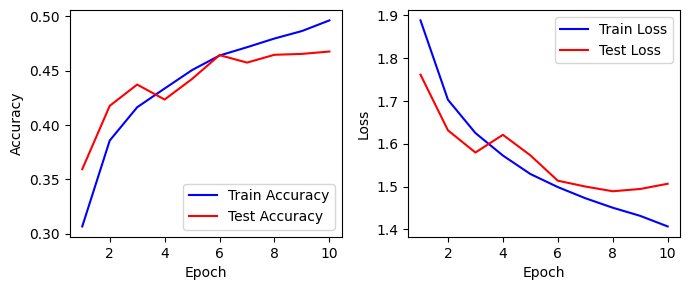

In [16]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

### Added regularization to the baseline model

In [20]:
from keras import regularizers

model = Sequential()
model.add(Dense(L1, input_dim = 3072, activation = 'relu',
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # output layer

In [100]:
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adam')

In [101]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32,
                    validation_data = (X_test, Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2706 - loss: 2.2205 - val_accuracy: 0.3692 - val_loss: 1.8081
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3736 - loss: 1.7950 - val_accuracy: 0.3592 - val_loss: 1.7867
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4002 - loss: 1.7262 - val_accuracy: 0.4099 - val_loss: 1.7075
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4158 - loss: 1.6884 - val_accuracy: 0.4089 - val_loss: 1.7367
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4270 - loss: 1.6633 - val_accuracy: 0.4275 - val_loss: 1.6841
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4395 - loss: 1.6341 - val_accuracy: 0.4345 - val_loss: 1.6583
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4428 - loss: 1.6217 - val_accuracy: 0.4548 - val_loss: 1.6043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4509 - loss: 1.6099 - 

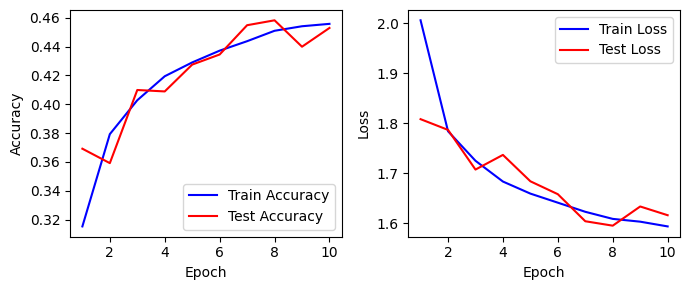

In [102]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

### Trying to add the dropout to the model 

In [21]:
from keras.layers import Dropout
from keras import regularizers

# Building a sequential model

model = Sequential()
model.add(Dense(L1, input_dim = 3072, activation = 'relu',
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(10, activation = 'softmax')) # output layer

In [29]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adam')

In [31]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32,
                    validation_data = (X_test, Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3161 - loss: 1.9375 - val_accuracy: 0.3619 - val_loss: 1.8011
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3570 - loss: 1.8421 - val_accuracy: 0.3944 - val_loss: 1.7407
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3752 - loss: 1.8028 - val_accuracy: 0.4117 - val_loss: 1.7008
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3901 - loss: 1.7564 - val_accuracy: 0.4138 - val_loss: 1.7099
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3981 - loss: 1.7421 - val_accuracy: 0.4002 - val_loss: 1.7506
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4017 - loss: 1.7334 - val_accuracy: 0.4202 - val_loss: 1.6779
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4080 - loss: 1.7166 - val_accuracy: 0.4274 - val_loss: 1.6682
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4103 - loss: 1.7023 - 

### The model perfomance is poor. 
### Decision is to run Grid search cross-validation to find the best hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [8]:
# Function to create model, required for KerasClassifier
def create_model():
  model = Sequential()
  model.add(Dense(200, input_dim = 3072, activation = 'relu'))
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(50, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  # Compile model
  model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam', metrics = ['accuracy'])

  return model

In [9]:
# create model
model = KerasClassifier(build_fn = create_model, verbose = 0)

In [10]:
# define the grid search parameters
batch_size = [32, 64, 128]
epochs = [10, 15, 20]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
             'Adam', 'Adamax', 'Nadam']
param_grid = dict(batch_size = batch_size, epochs = epochs,
                  optimizer = optimizer)
grid = GridSearchCV(estimator = model, param_grid = param_grid,
                    n_jobs = -1, cv = 4)

In [11]:
grid_result = grid.fit(X_train, Y_train)

C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
  print("%f with: %r" % (mean, param))

Best: 0.487260 using {'batch_size': 128, 'epochs': 20, 'optimizer': 'Adamax'}
0.452360 with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'SGD'}
0.458300 with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'RMSprop'}
0.456660 with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adagrad'}
0.460560 with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adadelta'}
0.458620 with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adam'}
0.461800 with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adamax'}
0.458740 with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Nadam'}
0.468480 with: {'batch_size': 32, 'epochs': 15, 'optimizer': 'SGD'}
0.463300 with: {'batch_size': 32, 'epochs': 15, 'optimizer': 'RMSprop'}
0.466000 with: {'batch_size': 32, 'epochs': 15, 'optimizer': 'Adagrad'}
0.472920 with: {'batch_size': 32, 'epochs': 15, 'optimizer': 'Adadelta'}
0.468020 with: {'batch_size': 32, 'epochs': 15, 'optimizer': 'Adam'}
0.462300 with: {'batch_size': 32, 'epochs': 15, 'optimizer': 'Adamax'}
0.

The best HP are:
batch size = 128
epochs = 20
adamax optimizer

Will proceed with these HP and try to change the architecture of the model to improve accuracy

To the model below the regularization was changed from L2 to Elastic Net.
Also added more neuron layers and changed the number of neurons

In [22]:
from keras.layers import Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Building a sequential model

model = Sequential()
model.add(Dense(1000, input_dim = 3072, activation = 'relu',
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l1_l2(1e-5, 1e-3)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(125, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
#model.add(Dropout(rate = 0.2))
model.add(Dense(10, activation = 'softmax')) # output layer

In [106]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adamax')

In [107]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [109]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 40, batch_size = 128,
                    validation_data = (X_test, Y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4847 - loss: 1.5342 - val_accuracy: 0.4808 - val_loss: 1.5704 - learning_rate: 0.0010
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4885 - loss: 1.5183 - val_accuracy: 0.4616 - val_loss: 1.6096 - learning_rate: 0.0010
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5025 - loss: 1.4785 - val_accuracy: 0.5002 - val_loss: 1.4906 - learning_rate: 0.0010
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5072 - loss: 1.4721 - val_accuracy: 0.4998 - val_loss: 1.4945 - learning_rate: 0.0010
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5140 - loss: 1.4463 - val_accuracy: 0.5098 - val_loss: 1.4803 - learning_rate: 0.0010
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5242 - loss: 1.4207 - val_accuracy: 0.5032 - val_loss: 1.4733 - learning_rate: 0.0010
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5293 - l

New architecture showed much better result with training accuracy of 67.94% validation accuracy of 55.83%

Will proceed with other activation functions, the following is LeakyReLU

In [23]:
# Building a sequential model
from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(1000, input_dim = 3072,
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l1_l2(1e-5, 1e-3)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(500))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(250))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(125))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(60))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(30))
model.add(LeakyReLU(alpha = 0.01))
#model.add(Dropout(rate = 0.2))
model.add(Dense(10, activation = 'softmax')) # output layer

C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [115]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adamax')

In [116]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [118]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 128,
                    validation_data = (X_test, Y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5609 - loss: 1.3301 - val_accuracy: 0.5223 - val_loss: 1.4513 - learning_rate: 0.0010
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5694 - loss: 1.3183 - val_accuracy: 0.5183 - val_loss: 1.4876 - learning_rate: 0.0010
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5729 - loss: 1.3082 - val_accuracy: 0.5243 - val_loss: 1.4511 - learning_rate: 0.0010
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.5797 - loss: 1.2797 - val_accuracy: 0.5246 - val_loss: 1.4423 - learning_rate: 0.0010
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5851 - loss: 1.2679 - val_accuracy: 0.5244 - val_loss: 1.4510 - learning_rate: 0.0010
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5886 - loss: 1.2590 - val_accuracy: 0.5106 - val_loss: 1.4907 - learning_rate: 0.0010
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5919 - l

Overall the perfomance is the same in terms of validation accuracy. Will try a new Swish activation function which outperforms Relu in some cases.

In [122]:
# Building a sequential model
from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(1000, input_dim = 3072,
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l1_l2(1e-5, 1e-3)))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(500))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(250))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(125))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(60))
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(30))
model.add(tf.keras.layers.Activation('swish'))
#model.add(Dropout(rate = 0.2))
model.add(Dense(10, activation = 'softmax')) # output layer

C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adamax')

In [124]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [125]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 128,
                    validation_data = (X_test, Y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.2566 - loss: 3.8733 - val_accuracy: 0.3628 - val_loss: 2.6930 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3766 - loss: 2.5258 - val_accuracy: 0.4143 - val_loss: 2.1320 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4055 - loss: 2.0854 - val_accuracy: 0.4307 - val_loss: 1.8906 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4201 - loss: 1.8702 - val_accuracy: 0.4329 - val_loss: 1.7900 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4446 - loss: 1.7248 - val_accuracy: 0.4422 - val_loss: 1.7235 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4586 - loss: 1.6598 - val_accuracy: 0.4675 - val_loss: 1.6546 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4681 - l

Architecture with Relu activation function remains the best across all tested activation fucntions.
The following step is running Grid search CV for the last time.

In [24]:
# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(1000, input_dim = 3072, activation = 'relu',
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l1_l2(1e-5, 1e-3)))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(250, activation = 'relu'))
    model.add(Dense(125, activation = 'relu'))
    model.add(Dense(60, activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    #model.add(Dropout(rate = 0.2))
    model.add(Dense(10, activation = 'softmax')) # output layer
    # Compile model
    model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adamax', metrics = ['accuracy'])

    return model

In [25]:
from scikeras.wrappers import KerasClassifier
# create model
model = KerasClassifier(build_fn = create_model, verbose = 0)

In [26]:
# define the grid search parameters
batch_size = [32, 64, 128]
epochs = [20]
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(batch_size = batch_size, epochs = epochs,
                  optimizer = optimizer)
grid = GridSearchCV(estimator = model, param_grid = param_grid,
                    n_jobs = -1, cv = 4)

In [30]:
grid_result = grid.fit(X_train, Y_train)

C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
  print("%f with: %r" % (mean, param))

Best: 0.495960 using {'batch_size': 128, 'epochs': 20, 'optimizer': 'RMSprop'}
0.491020 with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'SGD'}
0.487320 with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'RMSprop'}
0.480620 with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'Adam'}
0.493140 with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'Adamax'}
0.490260 with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'Nadam'}
0.486080 with: {'batch_size': 64, 'epochs': 20, 'optimizer': 'SGD'}
0.492640 with: {'batch_size': 64, 'epochs': 20, 'optimizer': 'RMSprop'}
0.489260 with: {'batch_size': 64, 'epochs': 20, 'optimizer': 'Adam'}
0.493020 with: {'batch_size': 64, 'epochs': 20, 'optimizer': 'Adamax'}
0.492640 with: {'batch_size': 64, 'epochs': 20, 'optimizer': 'Nadam'}
0.495460 with: {'batch_size': 128, 'epochs': 20, 'optimizer': 'SGD'}
0.495960 with: {'batch_size': 128, 'epochs': 20, 'optimizer': 'RMSprop'}
0.492260 with: {'batch_size': 128, 'epochs': 20, 'optimizer': 'Adam'}
0.494960 

Final model creation after grid search cv

In [51]:
# Building a sequential model

model = Sequential()
model.add(Dense(1000, input_dim = 3072, activation = 'relu',
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l1_l2(1e-4, 1e-2)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(125, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(10, activation = 'softmax')) # output layer

In [52]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'SGD')

In [53]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [55]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32,
                    validation_data = (X_test, Y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5632 - loss: 1.3196 - val_accuracy: 0.5345 - val_loss: 1.4016 - learning_rate: 1.0000e-04
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5582 - loss: 1.3305 - val_accuracy: 0.5360 - val_loss: 1.4012 - learning_rate: 1.0000e-04
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5624 - loss: 1.3191 - val_accuracy: 0.5377 - val_loss: 1.4027 - learning_rate: 1.0000e-04
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5587 - loss: 1.3275 - val_accuracy: 0.5342 - val_loss: 1.4024 - learning_rate: 1.0000e-04
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5603 - loss: 1.3278 - val_accuracy: 0.5327 - val_loss: 1.4047 - learning_rate: 1.0000e-04
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5636 - loss: 1.3252 - val_accuracy: 0.5355 - val_loss: 1.4011 - learning_rate: 1.0000e-04
Epoch 7/100
1563/1563 ━━━━━━━━━━━━

### Using Keras Tuner

In [27]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [28]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(1000, input_dim = 3072, activation = 'relu', 
                  kernel_initializer = 'he_normal',
                  kernel_regularizer = regularizers.l1_l2(1e-5, 1e-3)))

  # Tune the number of units in the Dense layer
  hp_units = hp.Int('units', min_value = 30, max_value = 1000, step = 33)
  model.add(Dense(units = hp_units, activation = 'relu'))
  
  hp_units = hp.Int('units', min_value = 30, max_value = 1000, step = 33)
  model.add(Dense(units = hp_units, activation = 'relu'))
  
  hp_units = hp.Int('units', min_value = 30, max_value = 1000, step = 33)
  model.add(Dense(units = hp_units, activation = 'relu'))

  hp_units = hp.Int('units', min_value = 30, max_value = 1000, step = 33)
  model.add(Dense(units = hp_units, activation = 'relu'))
  
  hp_units = hp.Int('units', min_value = 30, max_value = 1000, step = 33)
  model.add(Dropout(rate = hp.Float('dropout', 0, 0.3, step = 0.1)))

  model.add(Dense(10, activation = 'softmax'))

  # Compile model
  model.compile(optimizer = hp.Choice('optimizer', ['adamax', 'rmsprop']),
                loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [29]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5, # number of different models to try
    executions_per_trial = 2, # number of models to train for each trial
    directory = 'Cifar10 tuning results', # directory to store tuner results
    project_name = 'Cifar10 tuning' # project name
)

In [32]:
tuner.search(X_train, Y_train, epochs = 5, batch_size = 32,
             validation_data = (X_test, Y_test))

Trial 5 Complete [00h 05m 31s]
val_accuracy: 0.39159999787807465

Best val_accuracy So Far: 0.4431999921798706
Total elapsed time: 00h 29m 16s


In [50]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
# Get best model:
best_model = tuner.get_best_models(num_models = 1)[0]
# Print the best model
print(best_model.summary())
print('Best hyperparameters: ', best_hps.values)

C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\laric\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adamax', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │     3,073,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 195)            │       195,195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 195)            │        38,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 195)            │        38,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 195)            │        38,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 195)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,384,815 (12.91 MB)

 Trainable params: 3,384,815 (12.91 MB)

 Non-trainable params: 0 (0.00 B)

None
Best hyperparameters:  {'units': 195, 'dropout': 0.1, 'optimizer': 'adamax'}


In [64]:
# Building a sequential model

model = Sequential()
model.add(Dense(1000, input_dim = 3072, activation = 'relu',
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l1_l2(1e-2, 1e-2)))
model.add(Dense(195, activation = 'relu'))
model.add(Dense(195, activation = 'relu'))
model.add(Dense(195, activation = 'relu'))
model.add(Dense(195, activation = 'relu'))
model.add(Dense(195, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(10, activation = 'softmax')) # output layer

In [65]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adamax')

In [66]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [ ]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 128,
                    validation_data = (X_test, Y_test),
                    callbacks=[early_stopping, reduce_lr])

### The most balanced model across all is:
accuracy: 0.6794 - loss: 1.0034 - val_accuracy: 0.5583 - val_loss: 1.3730 - learning_rate: 1.0000e-04

Below are just the small experimentations

In [181]:
from keras.layers import Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import random

# Set the seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Building a sequential model

model = Sequential()
model.add(Dense(1000, input_dim = 3072, activation = 'relu',
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l1_l2(1e-4, 1e-4)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(100, activation = LeakyReLU(alpha = 0.01)))
model.add(Dropout(rate = 0.1))
model.add(Dense(10, activation = 'softmax')) # output layer

In [182]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'], optimizer = 'adamax')

In [183]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [184]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 128,
                    validation_data = (X_test, Y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.2433 - loss: 5.7147 - val_accuracy: 0.3244 - val_loss: 3.0010 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.3452 - loss: 2.7393 - val_accuracy: 0.3937 - val_loss: 2.2423 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.3718 - loss: 2.2181 - val_accuracy: 0.3909 - val_loss: 2.0495 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.3848 - loss: 2.0289 - val_accuracy: 0.4232 - val_loss: 1.9242 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4078 - loss: 1.9052 - val_accuracy: 0.4375 - val_loss: 1.8187 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4181 - loss: 1.8314 - val_accuracy: 0.4237 - val_loss: 1.8194 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4

In [ ]:
# accuracy: 0.3657 - loss: 1.8248 - val_accuracy: 0.3605 - val_loss: 1.8224 - learning_rate: 0.0010 - swish
# accuracy: 0.3879 - loss: 1.7672 - val_accuracy: 0.3786 - val_loss: 1.7741 - learning_rate: 0.0010 - relu
# accuracy: 0.3898 - loss: 1.7480 - val_accuracy: 0.4008 - val_loss: 1.7486 - learning_rate: 0.0010 - droprate 0.1
# accuracy: 0.4587 - loss: 1.6540 - val_accuracy: 0.4394 - val_loss: 1.7148 - learning_rate: 0.0010 - lr 0.0001 0.0001
# accuracy: 0.4632 - loss: 1.6506 - val_accuracy: 0.4460 - val_loss: 1.6908 - learning_rate: 0.0010 - changed relu to leakyrelu 0.01 in pred last layer